In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import pandas as pd
import seaborn as sns
import numpy as np

In [17]:
excel_file = 'Cleanup_Graph_1.xlsx'
data = pd.read_excel(excel_file, header=0, parse_cols = "B:E", )
data

/Users/spiky/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  


,Data_A,Data_B,Data_C,Data_D
0,1.0,1.0,1.0,1.0
1,1.1,1.1,1.1,1.1
2,1.2,1.2,1.2,1.2
3,1.3,1.3,1.3,1.3
4,NaN,NaN,NaN,NaN
5,0.9,0.9,0.9,0.9
6,0.8,0.8,0.8,0.8
7,0.7,0.7,0.7,0.7
8,0.6,0.6,0.6,0.6
9,NaN,NaN,NaN,NaN


In [18]:
n_rows, n_cols = data.shape
data_2 = data.dropna(how='all', axis='rows')
data_3 = data_2.dropna(how='any', axis='columns')
values = (data_3.values)

[2. 2. 2. 2.]
[0.7 0.7 0.7 0.7]
[2.1 2.1 2.1 2.1]
[0.6 0.6 0.6 0.6]
[2.2 2.2 2.2 2.2]
[0.5 0.5 0.5 0.5]


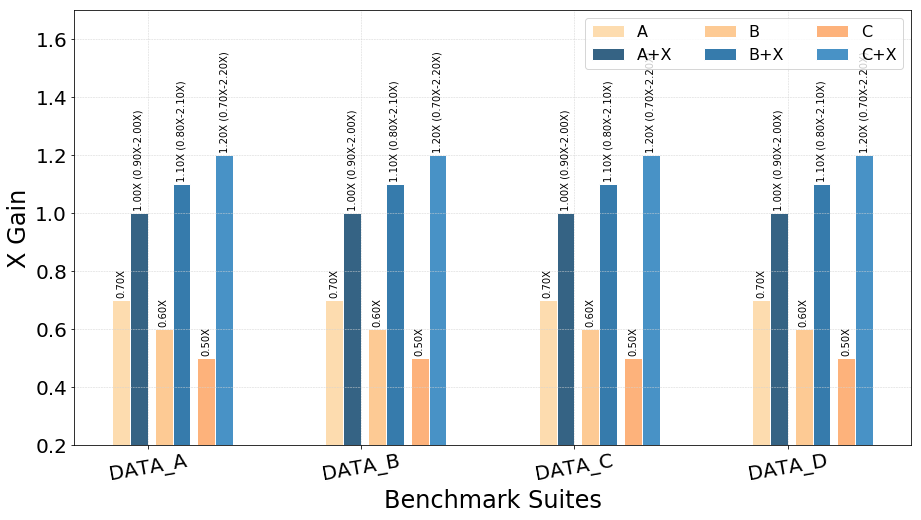

In [25]:
current_palette = sns.color_palette("Blues_d", n_colors=6)
my_cmap = sns.color_palette(current_palette).as_hex()

base_palette = sns.color_palette("OrRd", n_colors=9)
base_cmap = sns.color_palette(base_palette).as_hex()

num_bar_per = 4

barWidth = 0.5
labels = ['A+X', 'B+X', 'C+X', 'D+X']
labels_b = ['A', 'B', 'C', 'D']

r = np.arange(1,6*len(values[0]),6)
fig, ax = plt.subplots()
for i in range(3):
    cur_val = values[i]
    cur_min = values[num_bar_per+i]
    cur_max = values[2*num_bar_per+i]    
    cur_base = values[3*num_bar_per+i] 
    
    #max_bar = 100+100 * (cur_max - cur_base) / cur_base
    #min_bar = 100-100 * (cur_base - cur_min) / cur_base
    max_bar = (cur_max) 
    min_bar = (cur_min)    
    print(max_bar)
    
    base = values[3*num_bar_per+i] 
    print base
    #r_cur = [x + (2*i+1)*1.2*barWidth for x in r]  
    r_cur = [x + 2*i*1.2*barWidth for x in r]  

    bar2 = plt.bar(r_cur, cur_base, color=base_cmap[i+1], width=barWidth, 
        edgecolor='white', label=labels_b[i])
    
    r_cur = [x + 2*i*1.2*barWidth+barWidth for x in r]  
    
    bar1 = plt.bar(r_cur, cur_val, color=my_cmap[i+1], width=barWidth, 
            edgecolor='white', label=labels[i])
    
    #y_err=[cur_val-cur_min, cur_max-cur_val]
    y_err=[cur_min, cur_max]
   # xerr=[0.1, 0.1]
    #err_x = [r1[0], r1[0]]
    #b = [min1[0], max1[0]]

    #plt.errorbar(r_cur, cur_val, yerr = y_err, color=my_cmap[0], fmt='none', capsize=1.4, elinewidth=1.4)

    plt.xlabel('Benchmark Suites',  fontsize=24)
    plt.xticks([row + 1.5*barWidth for row in r],
            ['DATA_A', 'DATA_B', 'DATA_C', 'DATA_D'], rotation=10,  fontsize=16)
    



    for num, rect in enumerate(bar1):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height + 0.01, '%.2fX (%.2fX-%.2fX)' % (float(cur_val[num]), float(min_bar[num]), float(max_bar[num])), ha='center', va='bottom', rotation=90, fontsize=10)
    for num, rect in enumerate(bar2):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height + 0.01, '%.2fX' % (float(cur_base[num])), ha='center', va='bottom', rotation=90, fontsize=10)

      
       
        
     
base_palette = sns.color_palette("OrRd", n_colors=5)
base_cmap = sns.color_palette(base_palette).as_hex()

# for i in range(4):
#     base = values[3*num_bar_per+i] 
#     r_cur = [x + i*barWidth for x in r]  
#     plt.bar(r_cur, cur_val, color=base_cmap[i+1], width=barWidth, 
#         edgecolor='white', label=labels[i])
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
fig_size = plt.rcParams["figure.figsize"]
    
#plt.legend()
lgd = plt.legend(loc='upper right', fontsize=16, ncol=3)
plt.ylabel('X Gain', fontsize=24)
plt.ylim([0.4, 1.7])
#plt.show()
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
plt.grid(color='#D3D3D3', linestyle='--', linewidth=0.5)
plt.savefig('Graph1_Grouped_Bar.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')    
    

